<img src="newlogomioti.png" style="height: 100px">   
<br />
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S3 Plus: Estrategias de inversión utilizando detección de anomalías

Este challenge es extra solo para aquellos que deseen explorar el uso de técnicas de detección de anomalías sobre estrategias de inversión en el mercado de valores

## Objetivos

El objetivo de este challenge es utilizar técnicas de detección de anomalías para validar una posible estrategia de inversión en el mercado de valores.

Las hipótesis de partida son las siguientes:
- Mediante la detección de anomalías identificamos una serie de fechas clave donde el precio del valor se comporta de forma anómala.
- Si la anomalía es de tipo 'techo' parece que durante los días siguientes el precio del valor cae.
- Si la anomalía es de tipo 'suelo' parece que el precio del valor sube en los días inmediatemente siguientes (3-5 días)

Se trata de determinar para los valores seleccionados si dicha estrategia de inversión nos podría generar buenos resultados. La forma de validarlo es realizar backtesting, es decir revisar los resultados obtenidos en el caso de haber implementado dicha estrategia durante el último año.


Los valores seleccionados por los participantes en la sesión han sido los siguientes:

* Tesla: 'TSLA'
* IAG: 'IAG.MC'
* Santander: 'SAN.MC'
* Intel: 'INTC'
* Ence: 'ENC.MC'
* Alphabet-Google: 'GOOGL'
* Iberdrola: 'IBE.MC'
* Telefónica: 'TEF.MC'
* Facebook: 'FB'


A continuación indico los tickers que hemos seleccionado aunque este objeto no lo voy a utilizar mas adelante, es solo por tenerlo anotado y si necesitamos revisarlo

In [1]:
assets=['FB','TEF.MC','IBE.MC','GOOGL','ENC.MC','INTC','SAN.MC','IAG.MC','TSLA']

El objetivo es trabajar con datos desde el 1 de Enero de 2019 hasta el 21 de Febrero de 2020 (periodo pre-Covid). Tenlo en cuenta porque tienes iformación adicional en los datos que vas a cargar.

## Configuración del entorno

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)
import sklearn

## Cargamos los datos de los valores seleccionados

En primer lugar, cargamos los datos del fichero "historico_desde_2019_challenge_s3_plus.pkl". El formato pickle es un formato especial donde además de tener los datos cargados también tenemos la estructura del DataFrame. Este DataFrame también es un tanto particular porque es un "Multiindice"

In [3]:
df=pd.read_pickle("historico_desde_2019_challenge_s3_plus.pkl")

Y empezamos a explorar la información disponible

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 2018-12-31 to 2020-06-08
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, ENC.MC)  366 non-null    float64
 1   (Adj Close, FB)      361 non-null    float64
 2   (Adj Close, GOOGL)   361 non-null    float64
 3   (Adj Close, IAG.MC)  366 non-null    float64
 4   (Adj Close, IBE.MC)  366 non-null    float64
 5   (Adj Close, INTC)    361 non-null    float64
 6   (Adj Close, SAN.MC)  366 non-null    float64
 7   (Adj Close, TEF.MC)  366 non-null    float64
 8   (Adj Close, TSLA)    361 non-null    float64
 9   (Close, ENC.MC)      366 non-null    float64
 10  (Close, FB)          361 non-null    float64
 11  (Close, GOOGL)       361 non-null    float64
 12  (Close, IAG.MC)      366 non-null    float64
 13  (Close, IBE.MC)      366 non-null    float64
 14  (Close, INTC)        361 non-null    float64
 15  (Close, SAN.MC)      

In [5]:
df.tail()

Adj Close                                                     \
              ENC.MC          FB        GOOGL IAG.MC  IBE.MC       INTC   
Date                                                                      
2020-06-02     2.799  232.720001  1442.310059  2.809   9.932  62.119999   
2020-06-03     3.013  230.160004  1439.250000  3.129  10.115  61.930000   
2020-06-04     3.063  226.289993  1414.300049  3.199   9.958  62.970001   
2020-06-05     3.095  230.770004  1440.020020  3.675  10.030  64.339996   
2020-06-08     3.196         NaN          NaN  3.906  10.085        NaN   

                                       Close  ...        Open     Volume  \
            SAN.MC TEF.MC        TSLA ENC.MC  ...        TSLA     ENC.MC   
Date                                          ...                          
2020-06-02  2.1635  4.460  881.559998  2.799  ...  894.700012  3535211.0   
2020-06-03  2.2325  4.658  882.960022  3.013  ...  888.119995  2878807.0   
2020-06-04  2.2695  4.643  864.380005  3.063  ...  889.880005  2716800.0   
2020-06-05  2.5270  4.866  885.659973  3.095  ...  877.840027  2430224.0   
2020-06-08  2.5895  4.982         NaN  3.196  ...         NaN  1197300.0   

                                                                       \
                    FB      GOOGL      IAG.MC      IBE.MC        INTC   
Date                                                                    
2020-06-02  20919000.0  1172100.0  17937048.0  16812450.0  20702400.0   
2020-06-03  15380300.0  1386600.0  33037956.0  17010750.0  16737300.0   
2020-06-04  17041500.0  1349100.0  42679675.0  21867617.0  22010100.0   
2020-06-05  16727200.0  2132100.0  44964309.0  18420683.0  26809000.0   
2020-06-08         NaN        NaN  30452173.0   3853740.0         NaN   

                                                 
                 SAN.MC      TEF.MC        TSLA  
Date                                             
2020-06-02   86595536.0  28196098.0  13565600.0  
2020-06-03   99945871.0  26220913.0   7949500.0  
2020-06-04  149170528.0  36964916.0   8887700.0  
2020-06-05  171612196.0  28721798.0   7796100.0  
2020-06-08   72922882.0  10328403.0         NaN  

[5 rows x 54 columns]

Y si quisieramos ver todas la columnas relativas a los precios de cierre por ejemplo (Close), escribiríamos:

In [6]:
df['Close'].columns

Index(['ENC.MC', 'FB', 'GOOGL', 'IAG.MC', 'IBE.MC', 'INTC', 'SAN.MC', 'TEF.MC',
       'TSLA'],
      dtype='object')

También podemos ver que el dataframe ya está indexado por fecha para facilitar el trabajo posterior.

In [7]:
df.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-08'],
              dtype='datetime64[ns]', name='Date', length=372, freq=None)

## Algunas cuestiones a resolver:

* ¿Coinciden las fechas de las anomalías entre los diferentes valores?
* ¿El comportamiento en los días siguientes a la anomalía es el esperado? ¿Durante cuantos días? ¿en qué porcentaje de las ocasiones se produce el comportamiento esperado?
* Con una inversión de 1000€ durante el año ¿cuanto dinero habríamos ganado o perdido utilizando la estretegia de inversión considerada?
* ¿Qué diferencias obtienes entre la aproximación sencilla en la detección de anomalías y Isolation forest?


In [30]:
def anomaly_detector(df, ticker, wind, sigma):

    result = pd.DataFrame()
    result["Close"] = df[ticker]
    result["suelo"] = df[ticker].rolling(window=wind)\
        .mean() - (sigma * df[ticker].rolling(window=wind).std())
    result["techo"] = df[ticker].rolling(window=wind)\
        .mean() + (sigma * df[ticker].rolling(window=wind).std())
    result["anom_techo_flag"] = result.apply(
        lambda row: 1 if (row[0]>=row["techo"]) else 0, axis=1)
    result["anom_suelo_flag"] = result.apply(
        lambda row: 1 if (row[0]<=row["suelo"]) else 0, axis=1)
    result["anom_techo"] = result.apply(
        lambda row: row[0] if (row[0]>=row["techo"]) else 0, axis=1)
    result["anom_suelo"] = result.apply(
        lambda row: row[0] if (row[0]<=row["suelo"]) else 0, axis=1)
    result["ticker"] = ticker
    return result

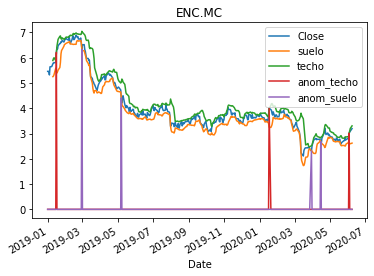

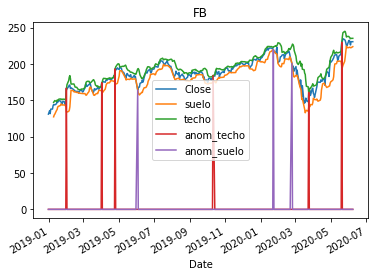

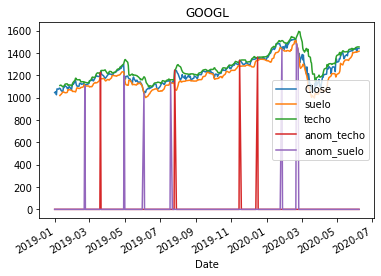

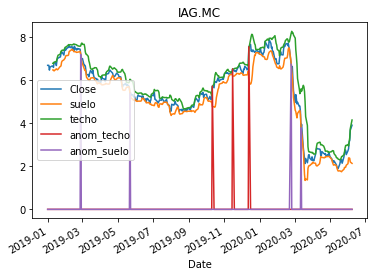

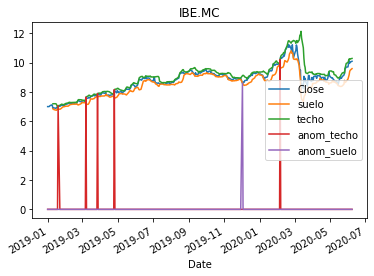

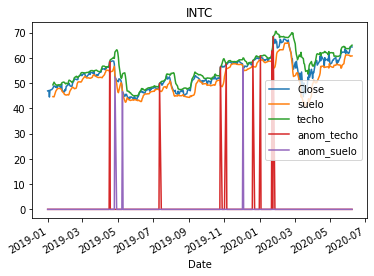

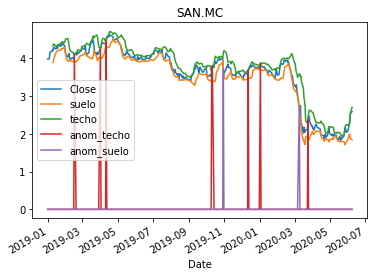

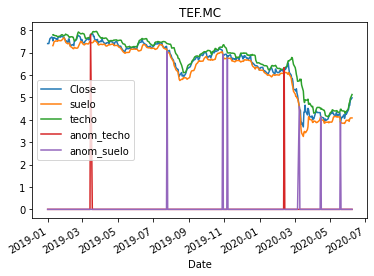

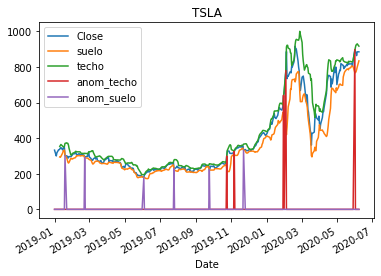

In [31]:
wind = 7
sigma = 2
tickers = df_close.columns
anoms = pd.DataFrame()
for ticker in tickers:
    review = anomaly_review(df_close,ticker,wind,sigma)
    review[["Close","suelo","techo","anom_techo","anom_suelo"]].plot(title=ticker)
    anoms = anoms.append(review, ignore_index=False)
anoms = anoms.drop(columns=['suelo', 'techo'])